Reference: https://github.com/enakai00/jupyter_tfbook

In [180]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

tf.logging.set_verbosity(tf.logging.ERROR)

np.random.seed(20180815)
tf.set_random_seed(20180815)

In [181]:
with open('./data/ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file, encoding='bytes')

In [182]:
x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W_conv = tf.Variable(tf.truncated_normal([5,5,1,2], stddev=0.1))
h_conv = tf.abs(tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME'))
h_conv_cutoff = tf.nn.relu(h_conv - 0.2)
h_pool = tf.nn.max_pool(h_conv_cutoff, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [183]:
h_pool_flat = tf.reshape(h_pool, [-1, 392])

num_units1 = 392
num_units2 = 2

w2 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b2 = tf.Variable(tf.zeros([num_units2]))
hidden2 = tf.nn.tanh(tf.matmul(h_pool_flat, w2) + b2)

w0 = tf.Variable(tf.zeros([num_units2, 3]))
b0 = tf.Variable(tf.zeros([3]))
p = tf.nn.softmax(tf.matmul(hidden2, w0) + b0)

In [184]:
t = tf.placeholder(tf.float32, [None, 3])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [185]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [186]:
i = 0
for _ in range(200):
    i += 1
    sess.run(train_step, feed_dict={x:images, t:labels})
    if i % 10 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:images, t:labels})
        print('Step: {}, Loss: {}, Accuracy: {}'.format(i, loss_val, acc_val))

Step: 10, Loss: 98.28689575195312, Accuracy: 0.7333333492279053
Step: 20, Loss: 97.38819885253906, Accuracy: 0.7666666507720947
Step: 30, Loss: 96.02784729003906, Accuracy: 0.8111110925674438
Step: 40, Loss: 94.21533203125, Accuracy: 0.855555534362793
Step: 50, Loss: 92.29862976074219, Accuracy: 0.8666666746139526
Step: 60, Loss: 90.33267974853516, Accuracy: 0.8666666746139526
Step: 70, Loss: 88.40650939941406, Accuracy: 0.9222221970558167
Step: 80, Loss: 86.39253234863281, Accuracy: 0.9444444179534912
Step: 90, Loss: 84.34394836425781, Accuracy: 0.9666666388511658
Step: 100, Loss: 82.4878158569336, Accuracy: 0.9777777791023254
Step: 110, Loss: 80.68875885009766, Accuracy: 0.9888888597488403
Step: 120, Loss: 78.81385803222656, Accuracy: 1.0
Step: 130, Loss: 77.14630889892578, Accuracy: 1.0
Step: 140, Loss: 75.61478424072266, Accuracy: 1.0
Step: 150, Loss: 74.154052734375, Accuracy: 1.0
Step: 160, Loss: 72.7510757446289, Accuracy: 1.0
Step: 170, Loss: 71.39751434326172, Accuracy: 1.0
St

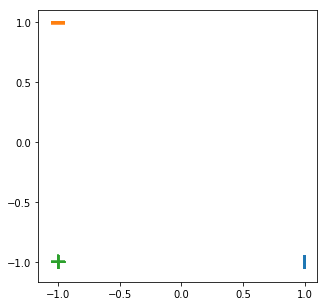

In [187]:
hidden2_vals = sess.run(hidden2, feed_dict={x:images})

z1_vals = [[], [], []]
z2_vals = [[], [], []]

for hidden2_val, label in zip(hidden2_vals, labels):
    label_num = np.argmax(label)
    z1_vals[label_num].append(hidden2_val[0])
    z2_vals[label_num].append(hidden2_val[1])

fig = plt.figure(figsize=(5,5))
subplot = fig.add_subplot(1,1,1)
subplot.scatter(z1_vals[0], z2_vals[0], s=200, marker='|')
subplot.scatter(z1_vals[1], z2_vals[1], s=200, marker='_')
subplot.scatter(z1_vals[2], z2_vals[2], s=200, marker='+')

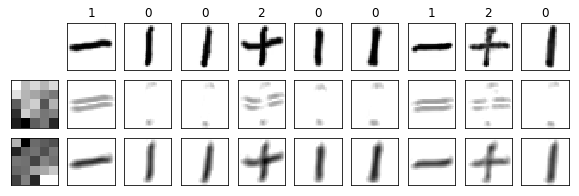

In [188]:
filter_vals, conv_vals = sess.run([W_conv, h_conv_cutoff], feed_dict={x:images[:9]})

fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals)

for i in range(9):
    
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')

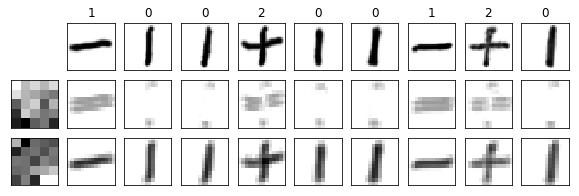

In [189]:
pool_vals = sess.run(h_pool, feed_dict={x:images[:9]})
v_max = np.max(pool_vals)

fig = plt.figure(figsize=(10,3))

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i], cmap=plt.cm.gray_r, interpolation='nearest')

v_max = np.max(conv_vals)

for i in range(9):
    
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('{}'.format(np.argmax(labels[i])))
    subplot.imshow(images[i].reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,0], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_vals[i,:,:,1], vmin=0, vmax=v_max, cmap=plt.cm.gray_r, interpolation='nearest')

In [190]:
sess.close()